# Simple Linear Regression

### Problem Statement :- 

    - Build a model to predict the calories consumed.

In [1]:
import warnings
warnings.filterwarnings('ignore')

### Data Understanding and Preparation

In [2]:
import pandas as pd
import numpy as np
cal = pd.read_csv ("~/desktop/Digi 360/Module 6/DataSets-4/calories_consumed.csv")
cal.head()

,Weight gained (grams),Calories Consumed
0,108,1500
1,200,2300
2,900,3400
3,200,2200
4,300,2500


In [3]:
# Renaming the columns

cal = cal.rename(columns={'Weight gained (grams)':'weight_gain','Calories Consumed':'cal_cons'})

In [4]:
##let's describe the DF
cal.describe()

,weight_gain,cal_cons
count,14.000000,14.000000
mean,357.714286,2340.714286
std,333.692495,752.109488
min,62.000000,1400.000000
25%,114.500000,1727.500000
50%,200.000000,2250.000000
75%,537.500000,2775.000000
max,1100.000000,3900.000000


In [5]:
#Median for weight gained
print(cal.weight_gain.median())

200.0


In [6]:
#Median for cals consumed
print(cal.cal_cons.median())

2250.0


Here, the mean is greater than the median for weight gained so the distribution is right skewed. 

Similarly, the mean is greater than the median for calories consumed so the distribution is right skewed. 


### Visualization

In [7]:
##Boxplot for salary hike
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(y=cal['weight_gain'])
plt.show()

<Figure size 640x480 with 1 Axes>

In [8]:
#Finding outliers for Salary_hike
Q1 =  cal['weight_gain'].quantile(0.25)
Q3 =  cal['weight_gain'].quantile(0.75)
IQR = Q3 - Q1
Outlr = cal[(cal['weight_gain'] < Q1-1.5*IQR ) | (cal['weight_gain'] > Q3+1.5*IQR)]['weight_gain']
print("Outliers:", Outlr)

Outliers: Series([], Name: weight_gain, dtype: int64)


So, there are no outliers.

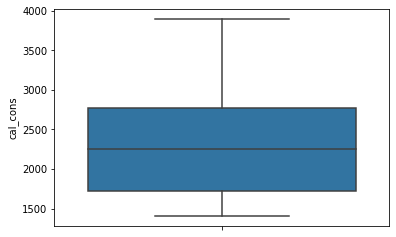

In [9]:
#Boxplot for Churn_out_rate
import seaborn as sns
sns.boxplot(y=cal['cal_cons'])
plt.show()

In [10]:
###Finding outliers for Churn_out_rate
Q1 =  cal['cal_cons'].quantile(0.25)
Q3 =  cal['cal_cons'].quantile(0.75)
IQR = Q3 - Q1
Outlr = cal[(cal['cal_cons'] < Q1-1.5*IQR ) | (cal['cal_cons'] > Q3+1.5*IQR)]['cal_cons']
print("Outliers:", Outlr)


Outliers: Series([], Name: cal_cons, dtype: int64)


So, there are no outliers.

Let’s draw scatter diagram to see the relationship between weight gained and calories consumed.

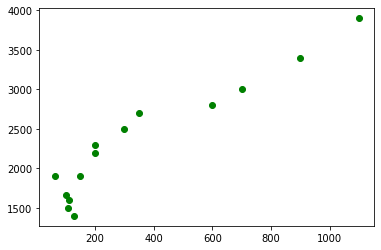

In [11]:
import matplotlib.pylab as plt
plt.scatter(x=cal['weight_gain'],y=cal['cal_cons'],color='green')
plt.show()

### Finding the correlation

In [12]:
#Finding the correlation coefficient
np.corrcoef(cal.weight_gain,cal.cal_cons)

array([[1.        , 0.94699101],
       [0.94699101, 1.        ]])

Here the correlation coefficient value is 0.95 which is greater than 0.85. So, the relationship between weight gained and cals consumed is strong. 

### Model Building

In [13]:
#Building the model
import statsmodels.formula.api as smf
model = smf.ols('cal_cons ~ weight_gain', data = cal).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               cal_cons   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     104.3
Date:                Wed, 24 Jun 2020   Prob (F-statistic):           2.86e-07
Time:                        16:13:34   Log-Likelihood:                -96.170
No. Observations:                  14   AIC:                             196.3
Df Residuals:                      12   BIC:                             197.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1577.2007    100.541     15.687      0.000    1358.141    1796.260
weight_gain     2.1344      0.209     10.211      0.000       1.679       2.590
==============================================================================
Omnibus:                        0.254   Durbin-Watson:                   2.308
Prob(Omnibus):                  0.881   Jarque-Bera (JB):                0.425
Skew:                          -0.098   Prob(JB):                        0.808
Kurtosis:                       2.169   Cond. No.                         719.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

So, the linear equation is 
y^ = 1577.2007 – 2.1344x. Here y^ = calories consumed and x = weight gained. 


Here p value is less than 0.05 so we reject the null hypothesis. That means there is significant correlation between salary hike and churn out rate.

Here we also can see R-squared value is 0.90 which is greater than 0.85. Hence our model is good and we don't need further transformations. 


### Model Evolution

In [14]:
pred = model.predict(pd.DataFrame(cal['weight_gain']))
pred

0     1807.718381
1     2004.085294
2     3498.181364
3     2004.085294
4     2217.527589
5     1811.987227
6     1850.406841
7     1709.534925
8     2857.854477
9     3925.065955
10    1790.642998
11    1897.364146
12    2324.248737
13    3071.296772
dtype: float64

In [15]:
#99% CI 
print(model.conf_int(0.01))

                       0            1
Intercept    1270.095322  1884.306082
weight_gain     1.495944     2.772902


In [16]:
#Finding RMSE
res = cal.cal_cons - pred
squares = res * res
mse = np.mean(squares)
rmse = np.sqrt(mse)
rmse

232.8335007096088

So, we can conclude that our predicted values are 232 points deviated from actual values.

### Conclusion:- 

    - R^2 value for linear model is 0.90
    - So our model is good.